In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df=pd.read_excel('Press secretary analysis.xlsx')

In [50]:
df.head()

,Press Secretary,Years,President,Commonly Covering News Agencies,Publication Bias
0,Ari Fleischer,2001 – 2003,George W. Bush,"AP, Reuters, CNN, Fox News, ABC, CBS, NBC","AP – Center, Reuters – Center, CNN – Lean Left..."
1,Scott McClellan,2003 – 2006,George W. Bush,"AP, Reuters, CNN, Fox News, NYT, WaPo","AP – Center, Reuters – Center, CNN – Lean Left..."
2,Tony Snow,2006 – 2007,George W. Bush,"AP, Reuters, CNN, Fox News, broadcast networks","AP – Center, Reuters – Center, CNN – Lean Left..."
3,Dana Perino,2007 – 2009,George W. Bush,"AP, Reuters, CNN, Fox News, MSNBC","AP – Center, Reuters – Center, CNN – Lean Left..."
4,Robert Gibbs,2009 – 2011,Barack Obama,"AP, Reuters, NYT, WaPo, CNN, MSNBC","AP – Center, Reuters – Center, NYT – Left, WaP..."


In [51]:
df.tail()

,Press Secretary,Years,President,Commonly Covering News Agencies,Publication Bias
9,Stephanie Grisham,2019 – 2020,Donald Trump,"AP, Reuters, Fox, major outlets","AP – Center, Reuters – Center, Fox News – Righ..."
10,Kayleigh McEnany,2020 – 2021,Donald Trump,"AP, Reuters, Fox, CNN, NYT, WaPo","AP – Center, Reuters – Center, Fox News – Righ..."
11,Jen Psaki,2021 – 2022,Joe Biden,"AP, Reuters, NYT, WaPo, CNN, MSNBC, PBS","AP – Center, Reuters – Center, NYT – Left, WaP..."
12,Karine Jean‑Pierre,2022 – 2025,Joe Biden,"AP, Reuters, NYT, WaPo, CNN, MSNBC, PBS","AP – Center, Reuters – Center, NYT – Left, WaP..."
13,Karoline Leavitt,2025 – present,Donald Trump,"AP, Reuters, Fox News, CNN, NYT, WaPo, new med...","AP – Center, Reuters – Center, Fox News – Righ..."


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Press Secretary                  14 non-null     object
 1   Years                            14 non-null     object
 2   President                        14 non-null     object
 3   Commonly Covering News Agencies  14 non-null     object
 4   Publication Bias                 14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [53]:
df.columns

Index(['Press Secretary', 'Years', 'President',
       'Commonly Covering News Agencies', 'Publication Bias'],
      dtype='object')

In [54]:
df['Commonly Covering News Agencies'] = df['Commonly Covering News Agencies'].str.split(',')
df_exploded = df.explode('Commonly Covering News Agencies')
df_exploded['Commonly Covering News Agencies'] = df_exploded['Commonly Covering News Agencies'].str.strip()
agency_counts = df_exploded.groupby('Commonly Covering News Agencies')['Press Secretary'].nunique().sort_values(ascending=False)
agency_counts

Commonly Covering News Agencies
AP                         14
Reuters                    14
CNN                        13
NYT                        10
WaPo                       10
Fox News                    6
MSNBC                       5
Fox                         3
NBC                         2
PBS                         2
ABC                         1
CBS                         1
broadcast networks          1
major outlets               1
new media/Livestreamers     1
Name: Press Secretary, dtype: int64

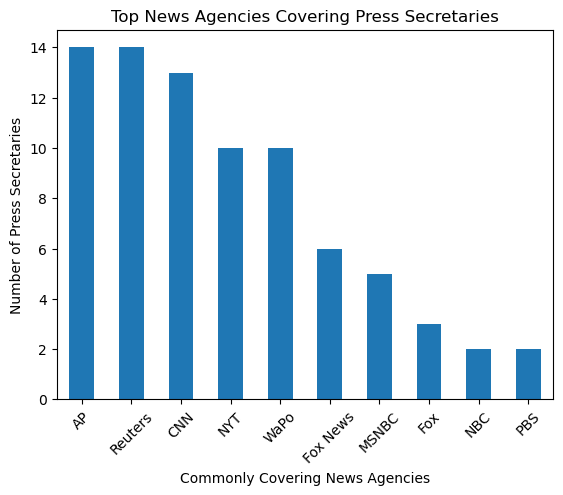

In [60]:
agency_counts.head(10).plot(kind='bar')
plt.title("Top News Agencies Covering Press Secretaries")
plt.ylabel("Number of Press Secretaries")
plt.xticks(rotation=45)
plt.show()

In [61]:
bias_list = []
for entry in df["Publication Bias"]:
    parts = entry.split(",")
    for p in parts:
        bias = p.split("–")[-1].strip()
        bias_list.append(bias)

bias_series = pd.Series(bias_list)
bias_counts = bias_series.value_counts()


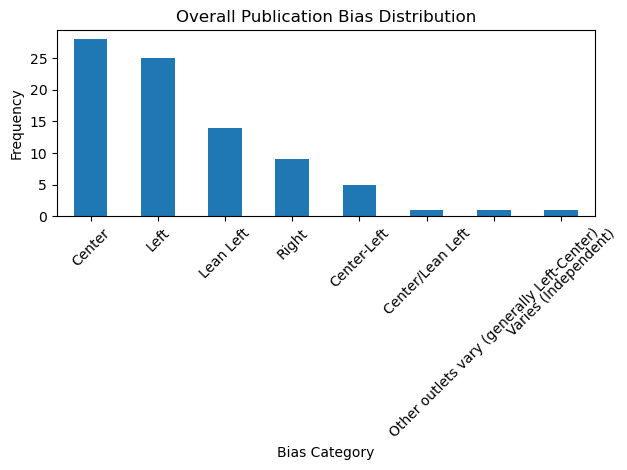

In [62]:
plt.figure()
bias_counts.plot(kind='bar')
plt.title("Overall Publication Bias Distribution")
plt.xlabel("Bias Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Non-Center publications = Lean Left + Left + Right + Independent

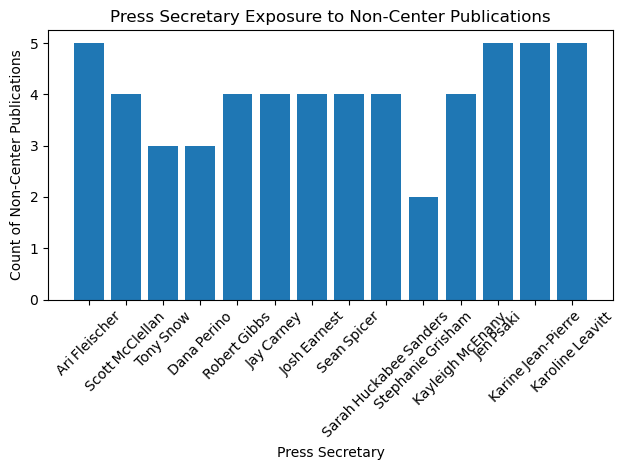

In [63]:
def count_non_center(entry):
    parts = entry.split(",")
    count = 0
    for p in parts:
        bias = p.split("–")[-1].strip()
        if bias != "Center":
            count += 1
    return count

df["Non-Center Bias Count"] = df["Publication Bias"].apply(count_non_center)

plt.figure()
plt.bar(df["Press Secretary"], df["Non-Center Bias Count"])
plt.title("Press Secretary Exposure to Non-Center Publications")
plt.xlabel("Press Secretary")
plt.ylabel("Count of Non-Center Publications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

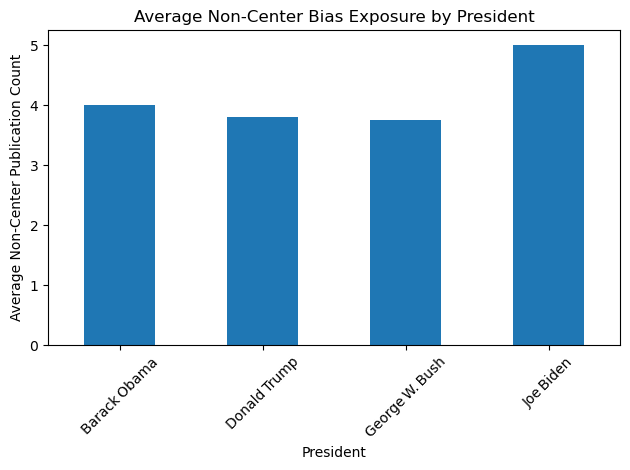

In [64]:
pres_bias = df.groupby("President")["Non-Center Bias Count"].mean()
plt.figure()
pres_bias.plot(kind='bar')
plt.title("Average Non-Center Bias Exposure by President")
plt.xlabel("President")
plt.ylabel("Average Non-Center Publication Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

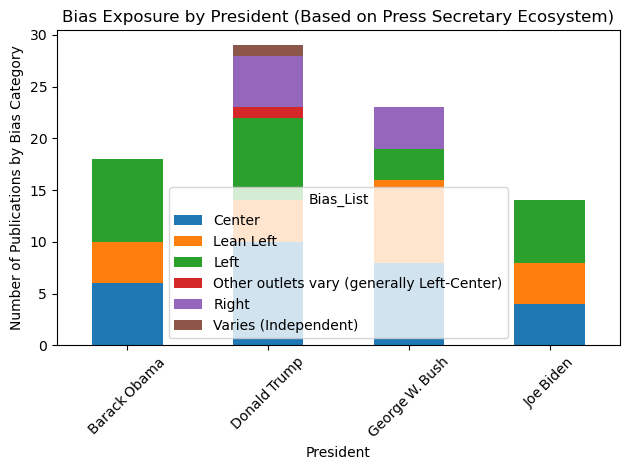

Bias_List,Center,Lean Left,Left,Other outlets vary (generally Left-Center),Right,Varies (Independent)
President,,,,,,
Barack Obama,6,4,8,0,0,0
Donald Trump,10,4,8,1,5,1
George W. Bush,8,8,3,0,4,0
Joe Biden,4,4,6,0,0,0


In [66]:
df1 = pd.DataFrame(df, columns=["President","Publication Bias"])
def extract_bias(entry):
    parts = entry.split(",")
    return [p.split("–")[-1].strip() for p in parts]

df1["Bias_List"] = df1["Publication Bias"].apply(extract_bias)

exploded = df1.explode("Bias_List")

exploded["Bias_List"] = exploded["Bias_List"].replace({
    "Center-Left": "Lean Left",
    "Center/Lean Left": "Lean Left",
    "Independent": "Independent"
})

pres_bias = pd.crosstab(exploded["President"], exploded["Bias_List"])
pres_bias.plot(kind="bar", stacked=True)
plt.title("Bias Exposure by President (Based on Press Secretary Ecosystem)")
plt.xlabel("President")
plt.ylabel("Number of Publications by Bias Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

pres_bias

🎯 Final Dataset-Based Conclusion
🔴 Most Biased Regime:

Donald Trump administration (19 non-center exposures)

🔵 Most Balanced Regime:

George W. Bush (15 but distributed across Lean Left + Right)

🟢 Strongest Left-Dominant Regime:

Barack Obama

🧑‍💼 Highest Bias-Exposure Press Secretaries:

Tie at 5 (Fleischer, Psaki, Jean-Pierre, Leavitt)